## Observations and Insights 

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
m_path = "data/Mouse_metadata.csv"
s_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(m_path)
study_results = pd.read_csv(s_path)

In [4]:
# Combine the data into a single dataset
m_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
m_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
len(m_data['Mouse ID'].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
m_doubles = m_data[m_data.duplicated(subset =['Mouse ID', 'Timepoint'], keep = 'first')]
m_doubles

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
m_clean = m_data.drop_duplicates(subset =['Mouse ID', 'Timepoint'], keep='first')
m_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(m_clean['Mouse ID'].unique())

249

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

m_table = m_clean.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

m_avg = m_table['Tumor Volume (mm3)'].mean()
m_med = m_table['Tumor Volume (mm3)'].median()
m_var = m_table['Tumor Volume (mm3)'].var()
m_std = m_table['Tumor Volume (mm3)'].std()
m_sem = m_table['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

m_drug_reg = pd.DataFrame({"Mean": [m_avg], 
                           "Median": [m_med], 
                           "Variance": [m_var],
                           "Standard Deviation": [m_std], 
                           "SEM": [m_sem]})


#m_drug_reg
m_table


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

m_avg_sing = m_clean['Tumor Volume (mm3)'].mean()
m_med_sing = m_clean['Tumor Volume (mm3)'].median()
m_var_sing = m_clean['Tumor Volume (mm3)'].var()
m_std_sing = m_clean['Tumor Volume (mm3)'].std()
m_sem_sing = m_clean['Tumor Volume (mm3)'].sem()

# Using the aggregation method, produce the same summary statistics in a single line

m_sing = pd.DataFrame({"Mean": [m_avg_sing], "Median": [m_med_sing], "Variance": [m_var_sing],
                           "Standard Deviation": [m_std_sing], "SEM": [m_sem_sing]})



m_sing

,Mean,Median,Variance,Standard Deviation,SEM
0,50.449276,48.951421,79.291277,8.904565,0.204933


In [11]:
m_sing.aggregate({"Mean": ['mean'], "Median": ['median'], "Variance": ['var'], "Standard Deviation": ['std'], "SEM": ['sem']})

,Mean,Median,Variance,Standard Deviation,SEM
mean,50.449276,NaN,NaN,NaN,NaN
median,NaN,48.951421,NaN,NaN,NaN
var,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
sem,NaN,NaN,NaN,NaN,NaN


## Bar and Pie Charts

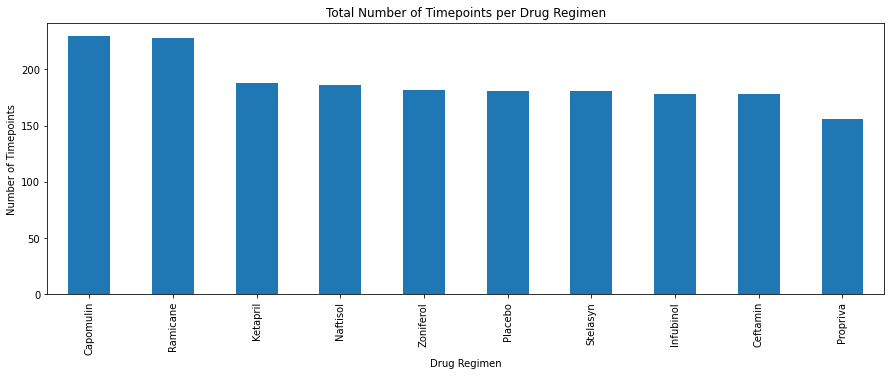

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_data = m_clean["Drug Regimen"].value_counts()

mp_clean = drug_data.plot(kind="bar", figsize=(15,5))

mp_clean


# Set a title for the chart
plt.title("Total Number of Timepoints per Drug Regimen")
mp_clean.set_xlabel("Drug Regimen")
mp_clean.set_ylabel("Number of Timepoints")

plt.savefig("../Matplotlib-challenge/Images")
plt.show()
plt.tight_layout()  


In [20]:
drug_data

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

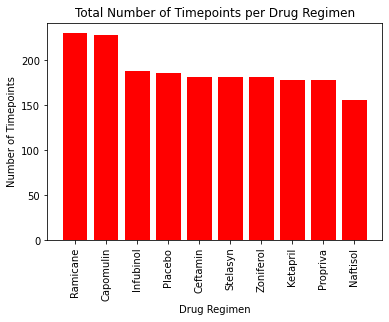

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
x_axis = np.arange(len(m_clean['Drug Regimen'].value_counts()))
drug_reg = m_clean['Drug Regimen'].value_counts()

plt.bar(x_axis, drug_reg, color = "r", align = "center")

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, drugs, rotation = "vertical") 
        
plt.title("Total Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")  

plt.savefig("../Matplotlib-challenge/Images")
plt.show()
    

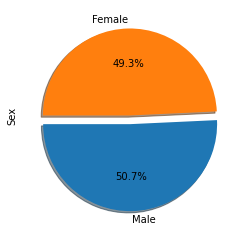

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = m_clean['Sex'].value_counts()

explode = (0.1,0)

ppie_data = gender_data.plot(kind = "pie", explode=explode, autopct="%1.1f%%", shadow=True,
                            startangle = 180)

([<matplotlib.patches.Wedge at 0x7f9ecd05eb50>,
 [Text(0.02795224913982119, -1.1996744023975945, 'Male'),
  Text(-0.025622792083347393, 1.099701537930112, 'Female')],
 [Text(0.016305478664895692, -0.6998100680652635, '50.7%'),
  Text(-0.013976068409098577, 0.5998372025073339, '49.3%')])

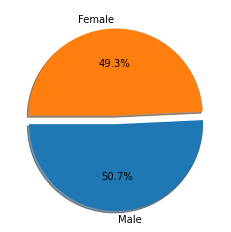

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']

plt.pie(gender_data, explode = explode, labels = labels, autopct="%1.1f%%", shadow = True,
        startangle=180)


## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

m_pt = m_clean.loc[(m_clean['Timepoint'] == 45)]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
m_tv = pd.merge(m_pt, m_clean, on = 'Tumor Volume (mm3)')

m_tv


,Mouse ID_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3),Metastatic Sites_x,Mouse ID_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,k403,Ramicane,Male,21,16,45,1
1,s185,Capomulin,Female,3,17,45,23.343598,1,s185,Capomulin,Female,3,17,45,1
2,x401,Capomulin,Female,16,15,45,28.484033,0,x401,Capomulin,Female,16,15,45,0
3,m601,Capomulin,Male,22,17,45,28.430964,1,m601,Capomulin,Male,22,17,45,1
4,g791,Ramicane,Male,11,16,45,29.128472,1,g791,Ramicane,Male,11,16,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,y769,Ceftamin,Female,6,27,45,68.594745,4,y769,Ceftamin,Female,6,27,45,4
126,y865,Ceftamin,Male,23,26,45,64.729837,3,y865,Ceftamin,Male,23,26,45,3
127,z581,Infubinol,Female,24,25,45,62.754451,3,z581,Infubinol,Female,24,25,45,3
128,z795,Naftisol,Female,13,29,45,65.741070,3,z795,Naftisol,Female,13,29,45,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
